<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practice" data-toc-modified-id="Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practice</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Practice

In [57]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


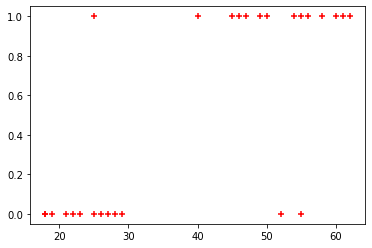

In [58]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [59]:
df.shape

(27, 2)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df[['age']].values
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)

In [62]:
X_test

array([[52],
       [56],
       [49]], dtype=int64)

In [63]:
X_train

array([[19],
       [25],
       [22],
       [27],
       [18],
       [45],
       [26],
       [62],
       [55],
       [25],
       [58],
       [54],
       [50],
       [60],
       [47],
       [28],
       [29],
       [55],
       [23],
       [18],
       [46],
       [40],
       [61],
       [21]], dtype=int64)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
model.predict(X_test)

array([1, 1, 1], dtype=int64)

In [68]:
model.score(X_test, y_test)

0.6666666666666666

In [69]:
model.predict_proba(X_test)

array([[0.0883589 , 0.9116411 ],
       [0.04917799, 0.95082201],
       [0.13437604, 0.86562396]])

### Exercise

> Perform EDA to figure out which variables have direct and clear impact on employee retention (whether they leave the company or continue to work

> Plot bar charts showing impact of employee salaries on retention

> Plot bar charts showing correlation between department and employee retention

> Build logistic regression model using variables that were narrowed down earlier.

> Measure accuracy of the model

In [70]:
df_hr = pd.read_csv('HR_comma_sep.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [71]:
df_hr.shape

(14999, 10)

In [72]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [73]:
df_hr.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [74]:
df_hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [75]:
df_hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [82]:
df_hr['average_monthly_hours'] = df_hr['average_montly_hours']
df_hr['work_accident'] = df_hr['Work_accident']

df_hr.drop(columns=['Work_accident', 'average_montly_hours'], axis=1, inplace=True)

In [83]:
df_hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,time_spend_company,promotion_last_5years,average_monthly_hours,work_accident
left,,,,,,,
0,0.666810,0.715473,3.786664,3.380032,0.026251,199.060203,0.175009
1,0.440098,0.718113,3.855503,3.876505,0.005321,207.419210,0.047326


In [79]:
numeric_vars = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours',
               'time_spend_company', 'work_accident', 'left', 'promotion_last_5years']
categoric_vars = ['Department', 'salary']

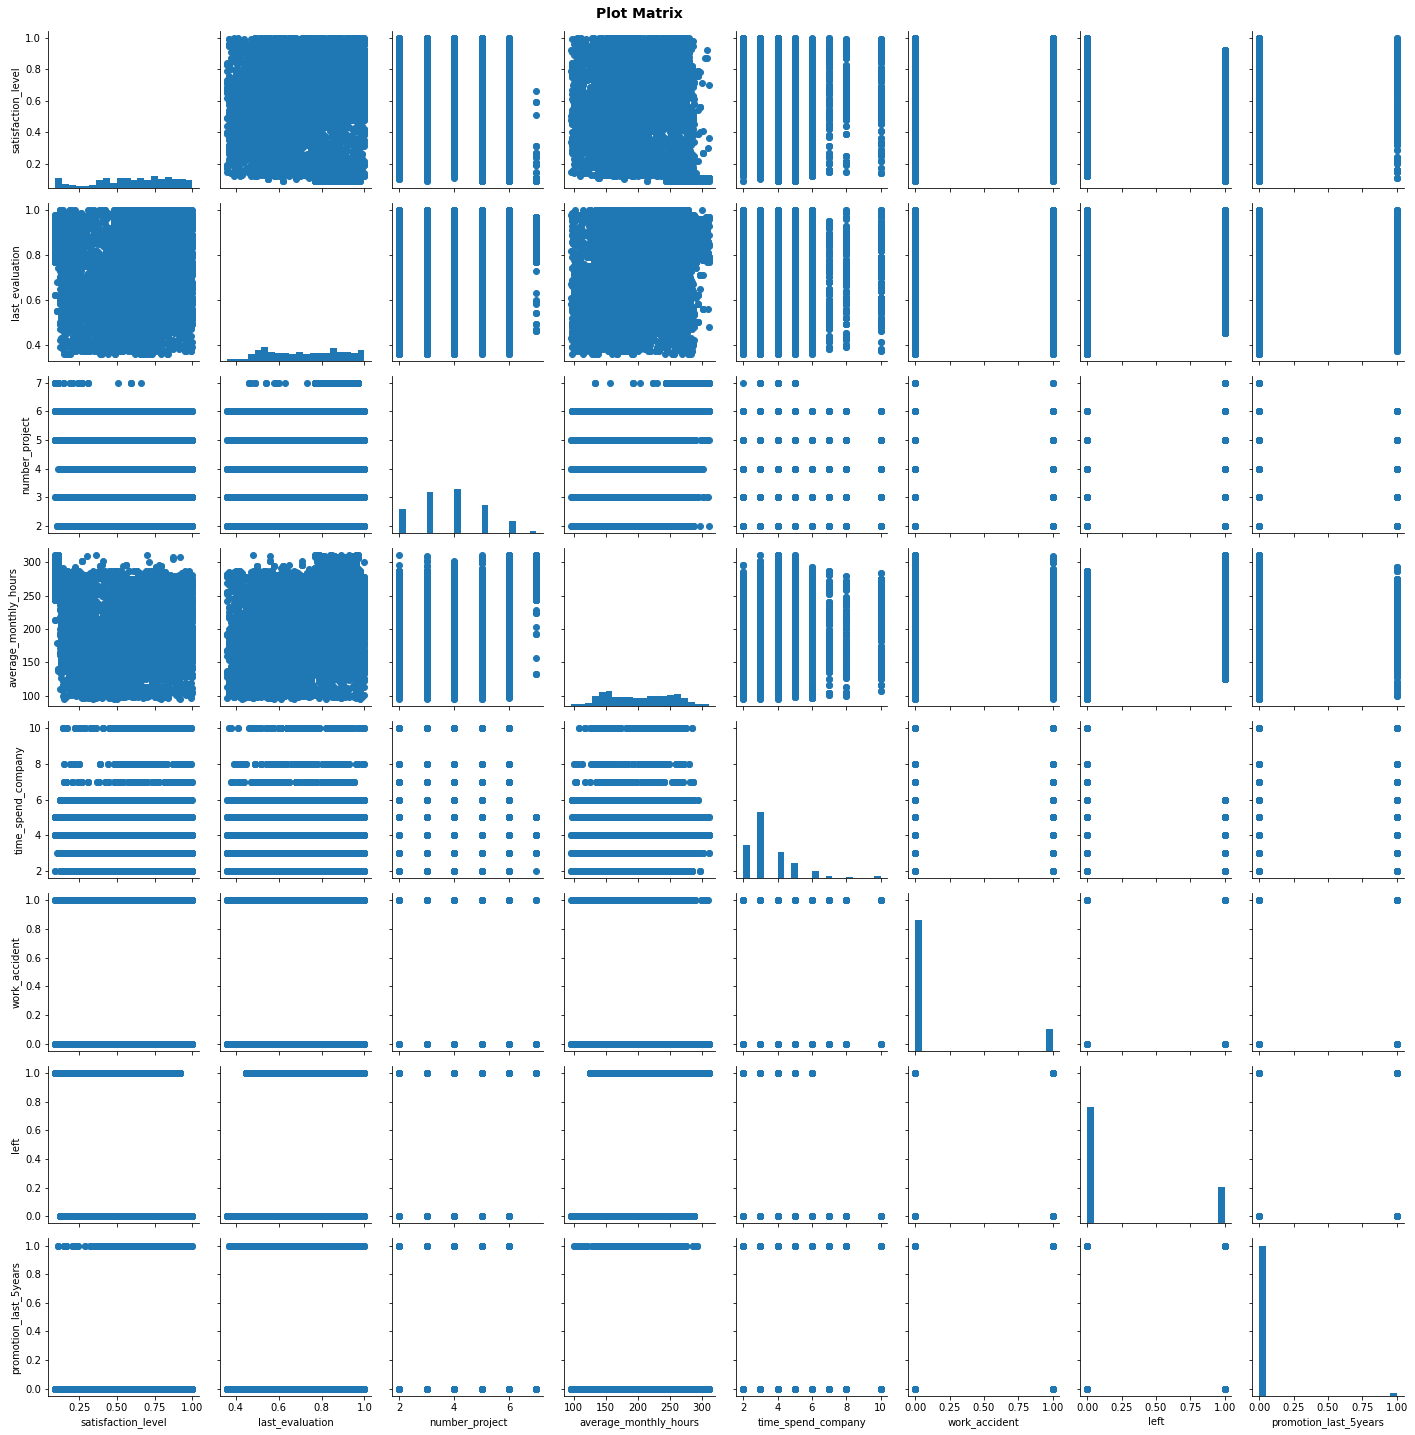

In [80]:
g = sb.PairGrid(data = df_hr, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.suptitle('Plot Matrix'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold');

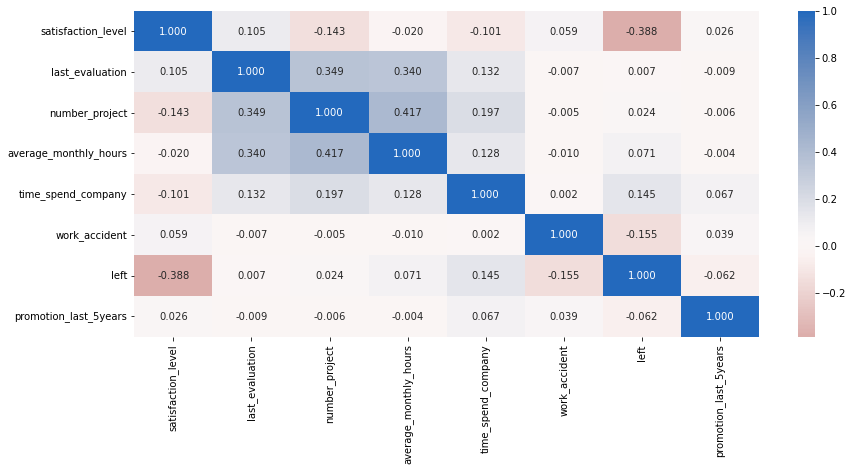

In [86]:
# correlation plot
plt.figure(figsize = [14, 6])
sb.heatmap(df_hr[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> Employees are more likely to stay at the firm if their satisfaction levels are higher.

> Employees are more likely to stay at the firm if they have recieved a promotion in the last 5 years.

> Employees are more likely to stay at the firm if they have avg less monthly hours into the firm.

> Employees are more likely to stay at the firm if they did get into a work accident.

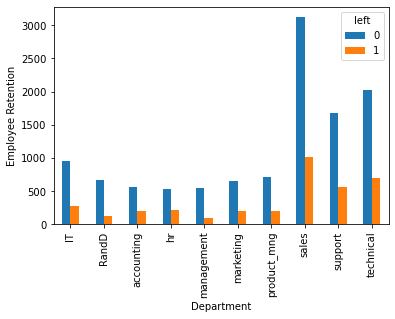

In [81]:
pd.crosstab(df_hr.Department, df_hr.left).plot(kind='bar')
plt.xticks(rotation=90);
plt.xlabel('Department')
plt.ylabel('Employee Retention');

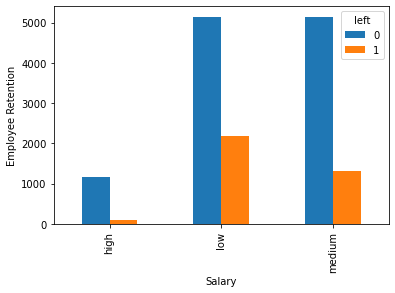

In [85]:
pd.crosstab(df_hr.salary, df_hr.left).plot(kind='bar')
plt.xticks(rotation=90);
plt.xlabel('Salary')
plt.ylabel('Employee Retention');

> Employees are more likely to stay at the firm if their salaries are lower.

> Employees are more likely to stay at the firm if they are in the sales department.

In [120]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,promotion_last_5years,Department,salary,average_monthly_hours,work_accident
0,0.38,0.53,2,3,1,0,sales,low,157,0
1,0.80,0.86,5,6,1,0,sales,medium,262,0
2,0.11,0.88,7,4,1,0,sales,medium,272,0
3,0.72,0.87,5,5,1,0,sales,low,223,0
4,0.37,0.52,2,3,1,0,sales,low,159,0


I'm going to build a logistic regression model with the following variables:

1. left (target variable)
2. satisfaction_level
3. promotion_last_5years
4. average_monthly_hours
5. work_accident
6. salary
7. department

First we will get dummies for the categorical variables then calculate VIFs to exlude any column due to multicollinearity.

In [121]:
# high, low, medium salaries
dummies_salary = pd.get_dummies(df_hr.salary)

merged_1 = pd.concat([df_hr, dummies_salary], axis='columns').drop(['salary'], axis=1)
merged_1

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,promotion_last_5years,Department,average_monthly_hours,work_accident,high,low,medium
0,0.38,0.53,2,3,1,0,sales,157,0,0,1,0
1,0.80,0.86,5,6,1,0,sales,262,0,0,0,1
2,0.11,0.88,7,4,1,0,sales,272,0,0,0,1
3,0.72,0.87,5,5,1,0,sales,223,0,0,1,0
4,0.37,0.52,2,3,1,0,sales,159,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,1,0,support,151,0,0,1,0
14995,0.37,0.48,2,3,1,0,support,160,0,0,1,0
14996,0.37,0.53,2,3,1,0,support,143,0,0,1,0
14997,0.11,0.96,6,4,1,0,support,280,0,0,1,0


In [122]:
dummies_dept = pd.get_dummies(df_hr.Department)

merged_2 = pd.concat([merged_1, dummies_dept], axis='columns').drop(['Department'], axis=1)
merged_2

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,promotion_last_5years,average_monthly_hours,work_accident,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,3,1,0,157,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,6,1,0,262,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,4,1,0,272,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,5,1,0,223,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,3,1,0,159,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,1,0,151,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,3,1,0,160,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,3,1,0,143,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,4,1,0,280,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [123]:
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   left                   14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   average_monthly_hours  14999 non-null  int64  
 7   work_accident          14999 non-null  int64  
 8   high                   14999 non-null  uint8  
 9   low                    14999 non-null  uint8  
 10  medium                 14999 non-null  uint8  
 11  IT                     14999 non-null  uint8  
 12  RandD                  14999 non-null  uint8  
 13  accounting             14999 non-null  uint8  
 14  hr                     14999 non-null  uint8  
 15  ma

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#independent variables
X = merged_2.loc[:, merged_2.columns != 'left']

# VIF dataframe
vif = pd.DataFrame()

#calculating VIF
vif["feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [125]:
vif.round(1)

,feature,VIF Factor
0,satisfaction_level,1.1
1,last_evaluation,1.2
2,number_project,1.4
3,time_spend_company,1.1
4,promotion_last_5years,1.0
5,average_monthly_hours,1.3
6,work_accident,1.0
7,high,inf
8,low,inf
9,medium,inf


We have VIF trouble! I need to remove some of the variables that have multicollinearity. 

In [126]:
merged_2.drop(columns=['last_evaluation', 'time_spend_company', 'number_project', 'IT', 'accounting', 'RandD', 'marketing',
'product_mng', 'support'], axis=1, inplace=True)

In [127]:
#independent variables
X = merged_2.loc[:, merged_2.columns != 'left']

# VIF dataframe
vif = pd.DataFrame()

#calculating VIF
vif["feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [128]:
vif.round(1)

,feature,VIF Factor
0,satisfaction_level,1.0
1,promotion_last_5years,1.0
2,average_monthly_hours,1.0
3,work_accident,1.0
4,high,3.1
5,low,12.6
6,medium,11.4
7,hr,1.1
8,management,1.1
9,sales,1.2


High to low salary share multicollinearity, we need to drop one and check our VIF again.

In [129]:
merged_2.drop(columns=['medium'], axis=1, inplace=True)

In [130]:
#independent variables
X = merged_2.loc[:, merged_2.columns != 'left']

# VIF dataframe
vif = pd.DataFrame()

#calculating VIF
vif["feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [131]:
vif.round(1)

,feature,VIF Factor
0,satisfaction_level,5.4
1,promotion_last_5years,1.0
2,average_monthly_hours,6.4
3,work_accident,1.2
4,high,1.2
5,low,2.0
6,hr,1.1
7,management,1.1
8,sales,1.6
9,technical,1.4


My features look good now, any VIF < 10 is acceptable here. Time to instatiate the model and train it.

In [139]:
X = merged_2.loc[:, merged_2.columns != 'left']
y = merged_2['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [140]:
model_retention = LogisticRegression(solver='lbfgs', max_iter=1000)

In [141]:
model_retention.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [142]:
model_retention.score(X_test, y_test)

0.7663333333333333

We have an accuracy of 76% We can do better!